In [390]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor 
warnings.filterwarnings("ignore")

In [391]:
seinfeld = pd.read_csv('seinfeld episode rankings.csv')

In [392]:
seinfeld

,Title,Plot,Quotability/cultural impact,Laughs,Total score,IMDb rating,IMDb rank,Notes,Season,episode
0,The Seinfeld Chronicles 1:1,4.0,7.0,7.0,8.521739,7.6,76.0,2nd button joke,1.0,1.0
1,Male Unbonding 1:2,3.0,6.5,2.0,1.695652,7.3,83.0,Kramer's pizza idea,1.0,2.0
2,The Stakeout 1:3,4.0,7.0,9.0,10.956522,7.7,72.0,Art Vandelay first appearance,1.0,3.0
3,The Robbery 1:4,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0
4,The Stock Tip 1:5,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
174,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [393]:
seinfeld.columns=['title','plot','quotability','laughs','total_score','imdb_rating','imdb_rank','notes','season','episode']

In [394]:
seinfeld=seinfeld[seinfeld.laughs>0]

In [395]:
seinfeld.sort_values('total_score',ascending=False)

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
76,The Marine Biologist,5.0,9.0,52.0,101.739130,9.2,4.0,NaN,5.0,14.0
82,The Hamptons 5:20,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0
50,The Contest 4:11,5.0,10.0,31.0,67.391304,9.6,1.0,first appearance of Estelle.,4.0,11.0
73,The Conversion,5.0,9.0,30.0,58.695652,8.1,52.0,NaN,5.0,11.0
83,The Opposite 5:21,4.0,9.0,31.5,49.304348,9.6,1.0,NaN,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...
20,The Dog 3:4,3.0,3.0,7.0,2.739130,7.3,83.0,NaN,3.0,4.0
14,The Baby Shower 2:10,3.0,3.0,7.0,2.739130,7.5,78.0,NaN,2.0,10.0
4,The Stock Tip 1:5,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0
3,The Robbery 1:4,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0


In [396]:
scripts = pd.read_csv('seinfeld_data/scripts.csv')

In [397]:
episodes = pd.read_csv('seinfeld_data/episode_info.csv')

In [398]:
episodes = episodes.drop(columns='Unnamed: 0')

In [399]:
episodes.Title = episodes.Title.astype(str)

In [400]:
episodes.Title = episodes.Title.str.lower().str.replace(' ','_').str.replace(',','')

In [401]:
scripts = scripts.drop(columns='Unnamed: 0')

In [402]:
scripts[0:211].SEID = 'S01E00'
scripts[0:211].EpisodeNo = 0.0

In [403]:
episodes

,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
0,1.0,1.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E01
1,1.0,1.0,the_stakeout,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
2,1.0,2.0,the_robbery,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
3,1.0,3.0,male_unbonding,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
4,1.0,4.0,the_stock_tip,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...
169,9.0,17.0,the_bookstore,"April 9, 1998",Spike Feresten,Andy Ackerman,S09E17
170,9.0,18.0,the_frogger,"April 23, 1998","Gregg Kavet, Andy Robin",Andy Ackerman,S09E18
171,9.0,19.0,the_maid,"April 30, 1998","Alec Berg, David Mandel, Jeff Schaffer",Andy Ackerman,S09E19
172,9.0,20.0,the_puerto_rican_day,"May 7, 1998","Alec Berg, Jennifer Crittenden, Spike Feresten...",Andy Ackerman,S09E20


In [404]:
episodes.SEID[0] = 'S01E00'
episodes.EpisodeNo[0] = 0.0

In [405]:
scripts

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0
2,GEORGE,Are you through?,0.0,S01E00,1.0
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0
...,...,...,...,...,...
54611,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,S09E23,9.0
54612,PRISONER 3,You suck - I'm gonna cut you.,23.0,S09E23,9.0
54613,JERRY,"Hey, I don't come down to where you work, and ...",23.0,S09E23,9.0
54614,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,S09E23,9.0


In [406]:
scripts[scripts.SEID=='S01E00']

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0
2,GEORGE,Are you through?,0.0,S01E00,1.0
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0
...,...,...,...,...,...
206,LAURA,"Yeah, yeah, hes a great guy...",0.0,S01E00,1.0
207,JERRY,Yeah.,0.0,S01E00,1.0
208,LAURA,"Youd really like him, you know, I cant wait to...",0.0,S01E00,1.0
209,JERRY,Me too!,0.0,S01E00,1.0


In [407]:
scripts.Character=scripts.Character.str.replace(r"\(.*\)","")

In [408]:
line_count=scripts.Character.value_counts().head(475)

In [409]:
scripts.Character.str.strip().value_counts()

JERRY                                                                                               14905
GEORGE                                                                                               9781
ELAINE                                                                                               8073
KRAMER                                                                                               6723
NEWMAN                                                                                                649
                                                                                                    ...  
(ELAINE finally notices them, but suddenly from the other direction, three other guys are coming        1
ALL THREE                                                                                               1
JERR                                                                                                    1
Dx                                            

In [410]:
episodes["SEID"] = episodes.SEID.astype(str)
scripts["SEID"] = scripts.SEID.astype(str)

In [411]:
scripts[scripts.SEID=='S01E04']

,Character,Dialogue,EpisodeNo,SEID,Season
1078,JERRY,Went out to dinner the other night. Check came...,4.0,S01E04,1.0
1079,JERRY,I think Superman probably has a very good sens...,4.0,S01E04,1.0
1080,GEORGE,I never heard him say anything really funny.,4.0,S01E04,1.0
1081,JERRY,"But its common sense. Hes got super strength, ...",4.0,S01E04,1.0
1082,GEORGE,"You would think that, but either youre born wi...",4.0,S01E04,1.0
...,...,...,...,...,...
1303,JERRY,We went over that.,4.0,S01E04,1.0
1304,GEORGE,Pst. (moves in close with Elaine and Jerry) Wi...,4.0,S01E04,1.0
1305,JERRY,A robot butcher?,4.0,S01E04,1.0
1306,GEORGE,"Shhhhh. If you want to get in, theres very lit...",4.0,S01E04,1.0


In [412]:
pd.merge(episodes, right=scripts, on='SEID')

,Season_x,EpisodeNo_x,Title,AirDate,Writers,Director,SEID,Character,Dialogue,EpisodeNo_y,Season_y
0,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,Do you know what this is all about? Do you kno...,0.0,1.0
1,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,1.0
2,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,GEORGE,Are you through?,0.0,1.0
3,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,"You do of course try on, when you buy?",0.0,1.0
4,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
54611,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,9.0
54612,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,PRISONER 3,You suck - I'm gonna cut you.,23.0,9.0
54613,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,JERRY,"Hey, I don't come down to where you work, and ...",23.0,9.0
54614,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,9.0


In [413]:
seinfeld.title[0] = 'good_news_bad_news'

In [414]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,76.0,2nd button joke,1.0,1.0
1,Male Unbonding 1:2,3.0,6.5,2.0,1.695652,7.3,83.0,Kramer's pizza idea,1.0,2.0
2,The Stakeout 1:3,4.0,7.0,9.0,10.956522,7.7,72.0,Art Vandelay first appearance,1.0,3.0
3,The Robbery 1:4,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0
4,The Stock Tip 1:5,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
79,The Wife,4.0,8.0,23.0,32.000000,8.0,60.0,NaN,5.0,17.0
80,The Raincoats 5:18,3.0,8.0,38.0,19.826087,8.3,35.0,NaN,5.0,18.0
81,The Fire 5:19,4.0,7.0,27.0,32.869565,8.5,21.0,"""Jon Favreau as eric the clown""",5.0,19.0
82,The Hamptons 5:20,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0


In [415]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,76.0,2nd button joke,1.0,1.0
1,Male Unbonding 1:2,3.0,6.5,2.0,1.695652,7.3,83.0,Kramer's pizza idea,1.0,2.0
2,The Stakeout 1:3,4.0,7.0,9.0,10.956522,7.7,72.0,Art Vandelay first appearance,1.0,3.0
3,The Robbery 1:4,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0
4,The Stock Tip 1:5,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
79,The Wife,4.0,8.0,23.0,32.000000,8.0,60.0,NaN,5.0,17.0
80,The Raincoats 5:18,3.0,8.0,38.0,19.826087,8.3,35.0,NaN,5.0,18.0
81,The Fire 5:19,4.0,7.0,27.0,32.869565,8.5,21.0,"""Jon Favreau as eric the clown""",5.0,19.0
82,The Hamptons 5:20,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0


In [416]:
episodes.columns = episodes.columns.str.lower()


In [417]:
seinfeld.title.tolist()

['good_news_bad_news',
 'Male Unbonding 1:2',
 'The Stakeout 1:3',
 'The Robbery 1:4',
 'The Stock Tip 1:5',
 'The Ex Girlfriend 2:1 ',
 'The Pony Remark 2:2',
 'The Jacket 2:3',
 'The Phone Message 2:4',
 'The Apartment 2:5',
 'The Statue 2.6',
 'The Revenge 2:7',
 'The Heart Attack 2:8',
 'The Deal 2:9',
 'The Baby Shower 2:10',
 'The Chinese Restaurant 2:11',
 'The Busboy 2:12',
 'The Note 3:1',
 'The Truth 3:2',
 'The Pen 3:3',
 'The Dog 3:4',
 'The Library 3:5',
 'The Parking Garage 3:6',
 'The Café 3:7',
 'The Tape 3:8',
 'The Nose Job 3:9',
 'The Stranded 3:10',
 'The Alternate Side 3:11',
 'The Red Dot 3:12',
 'The Subway 3:13',
 'The Pez Dispenser 3:14',
 'The Suicide 3:15',
 'The Fix Up 3:16',
 'The Boyfriend 3:17',
 'The New Friend 3:18',
 'The Limo 3:19',
 'The Good Samaritan 3:20',
 'The Letter 3:21',
 'The Parking Space 3:22',
 'The Keys 3:23',
 'The Trip pt 1 4:1',
 'The Trip pt 2 4:2',
 'The Pitch 4:3',
 'The Ticket 4:4',
 'The Wallet 4:5',
 'The Watch 4:6',
 'The Bubbl

In [418]:
seinfeld.title = seinfeld.title.str.replace(r"\d.*\d","").str.strip().str.replace(' ','_').str.lower()

In [419]:
seinfeld[seinfeld.title=="the_cafe"]

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode


In [420]:
seinfeld=pd.merge(seinfeld, right = episodes, on='title')

In [421]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,76.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,83.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,72.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,the_wife,4.0,8.0,23.0,32.000000,8.0,60.0,NaN,5.0,17.0,5.0,17.0,"March 17, 1994",Peter Mehlman,Tom Cherones,S05E17
69,the_raincoats,3.0,8.0,38.0,19.826087,8.3,35.0,NaN,5.0,18.0,5.0,18.0,April 28 1994,"Tom Gammill, Max Pross and Larry David, Jerry ...",Tom Cherones,S05E18
70,the_fire,4.0,7.0,27.0,32.869565,8.5,21.0,"""Jon Favreau as eric the clown""",5.0,19.0,5.0,20.0,"May 5, 1994",Larry Charles,Tom Cherones,S05E20
71,the_hamptons,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0,5.0,21.0,"May 12, 1994","Peter Mehlman, Carol Leifer",Tom Cherones,S05E21


In [422]:
seinfeld.sort_values('total_score',ascending=False).head(10)

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
65,the_marine_biologist,5.0,9.0,52.0,101.739130,9.2,4.0,NaN,5.0,14.0,5.0,14.0,"February 10, 1994","Ron Hague, Charlie Rubin",Tom Cherones,S05E14
71,the_hamptons,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0,5.0,21.0,"May 12, 1994","Peter Mehlman, Carol Leifer",Tom Cherones,S05E21
41,the_contest,5.0,10.0,31.0,67.391304,9.6,1.0,first appearance of Estelle.,4.0,11.0,4.0,11.0,"November 18, 1992",Larry David,Tom Cherones,S04E11
62,the_conversion,5.0,9.0,30.0,58.695652,8.1,52.0,NaN,5.0,11.0,5.0,11.0,"December 16, 1993",Bruce Kirschbaum,Tom Cherones,S05E11
72,the_opposite,4.0,9.0,31.5,49.304348,9.6,1.0,NaN,5.0,21.0,5.0,22.0,"May 19, 1994","Andy Cowan and Larry David, Jerry Seinfeld",Tom Cherones,S05E22
50,the_junior_mint,4.0,10.0,27.0,46.956522,8.7,11.0,"""DOLORES!!!""",4.0,20.0,4.0,20.0,"March 18, 1993",Andy Robin,Tom Cherones,S04E20
56,the_sniffing_accountant,4.0,9.0,27.5,43.043478,8.0,60.0,"""heres to feeling good all the time""",5.0,4.0,5.0,4.0,"October 7, 1993","Larry David, Jerry Seinfeld",Tom Cherones,S05E04
21,the_parking_garage,5.0,8.0,22.0,38.260870,8.8,9.0,NaN,3.0,6.0,3.0,6.0,"October 30, 1991",Larry David,Tom Cherones,S03E06
43,the_pick,4.0,9.0,24.0,37.565217,8.5,21.0,NaN,4.0,13.0,4.0,13.0,"December 16, 1992",Larry Charles,Tom Cherones,S04E13
35,the_pitch,5.0,10.0,16.5,35.869565,8.6,17.0,People like to say salsa,4.0,3.0,4.0,3.0,"September 16, 1992",Larry Charles,Tom Cherones,S04E03


In [423]:
seinfeld.director = seinfeld.director.replace('David&nbsp; Steinberg','David Steinberg')

In [424]:
seinfeld.director.value_counts()

Tom Cherones       68
David Steinberg     2
Art Wolff           1
Joshua White        1
Jason Alexander     1
Name: director, dtype: int64

In [425]:
grouped_scripts=scripts.groupby('SEID')

In [426]:
for key, item in grouped_scripts:
    print(grouped_scripts.get_group(key), "\n\n")

    Character                                           Dialogue  EpisodeNo  \
0       JERRY  Do you know what this is all about? Do you kno...        0.0   
1       JERRY  (pointing at Georges shirt) See, to me, that b...        0.0   
2      GEORGE                                   Are you through?        0.0   
3       JERRY             You do of course try on, when you buy?        0.0   
4      GEORGE  Yes, it was purple, I liked it, I dont actuall...        0.0   
..        ...                                                ...        ...   
206     LAURA                     Yeah, yeah, hes a great guy...        0.0   
207     JERRY                                              Yeah.        0.0   
208     LAURA  Youd really like him, you know, I cant wait to...        0.0   
209     JERRY                                            Me too!        0.0   
210     JERRY  I swear, I have absolutely no idea what women ...        0.0   

       SEID  Season  
0    S01E00     1.0  
1    S0

[322 rows x 5 columns] 


                                               Character  \
26623  I think the thing I admire most about the Chin...   
26624                                              JERRY   
26625                                             ELAINE   
26626                                              JERRY   
26627                                             ELAINE   
...                                                  ...   
26936                                              JERRY   
26937                                             GEORGE   
26938                                             KRAMER   
26939                                             NOREEN   
26940                                                MAN   

                                                Dialogue  EpisodeNo    SEID  \
26623  thousands of years ago, Chinese farmer gets up...        4.0  S06E04   
26624                 (feeling face) Good shave today...        4.0  S06E04   
26625  (sarcasti

[301 rows x 5 columns] 


           Character                                           Dialogue  \
52924           ALL                              Happy birthday to you.   
52925         WALTER                                            Thanks.   
52926  FEMALE WORKER                                      Elaine, cake?   
52927         ELAINE                                    Uh, no, thanks.   
52928  FEMALE WORKER                         It's Walter's special day.   
...              ...                                                ...   
53218       PETERMAN  Elaine, I have a question for you. Is the item...   
53219         ELAINE                             Um...as far as I know.   
53220       PETERMAN  Do you know what happens to a butter-based fro...   
53221         ELAINE                             Uh, I guess I hadn't--   
53222       PETERMAN  Well, I have a feeling that what you are about...   

       EpisodeNo    SEID  Season  
52924       18.0  S09E18     9.0  
529

In [427]:
seinfeld.writers.value_counts()

Larry David                                               17
Larry Charles                                             13
Larry David, Jerry Seinfeld                               11
Peter Mehlman                                              8
Bruce Kirschbaum                                           2
Tom Gammill, Max Pross                                     2
Andy Robin                                                 2
Larry David, Larry Charles                                 2
Larry David and Bill Masters                               1
Tom Leopold                                                1
Larry Charles / Story By Marc Jaffe                        1
Larry David and Greg Daniels                               1
Matt Goldman                                               1
Steve Skrovan, Bill Masters, Jon Hayman                    1
Larry David, Jerry Seinfeld and Matt Goldman               1
Larry David and Bob Shaw, Don McEnery                      1
Larry David, Peter Mehlm

In [428]:
grouped_scripts.Character.value_counts()

SEID    Character
S01E00  JERRY        94
        GEORGE       70
        KESSLER      20
        LAURA        15
        CLAIRE        7
                     ..
S09E23  PUDDY         1
        SECRETARY     1
        STRANGER      1
        SUSAN         1
        [Witness      1
Name: Character, Length: 3016, dtype: int64

In [429]:
import dask.dataframe as dd

In [430]:
scripts_dd=dd.from_pandas(scripts,npartitions=54615)

In [431]:
scripts_dd

,Character,Dialogue,EpisodeNo,SEID,Season
npartitions=27308,,,,,
0,object,object,float64,object,float64
2,...,...,...,...,...
...,...,...,...,...,...
54614,...,...,...,...,...
54615,...,...,...,...,...


In [432]:
seinfeld_prepped=seinfeld.drop(columns=['season_x','episode','notes','title','seid','writers','director'])

In [433]:
seinfeld_prepped.airdate=pd.to_datetime(seinfeld_prepped.airdate)
seinfeld_prepped = seinfeld_prepped.set_index('airdate').sort_values(by='airdate')

In [434]:
#seinfeld_prepped = pd.get_dummies(seinfeld_prepped, columns=['writers','director'], drop_first=True)

In [435]:
train=seinfeld_prepped[seinfeld_prepped.season_y<4]
validate=seinfeld_prepped[seinfeld_prepped.season_y>3]

In [436]:
train

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno
airdate,,,,,,,,
1989-07-05,4.0,7.0,7.0,8.521739,7.6,76.0,1.0,0.0
1990-05-31,4.0,7.0,9.0,10.956522,7.7,72.0,1.0,1.0
1990-06-07,3.0,3.5,5.5,2.510870,7.6,76.0,1.0,2.0
1990-06-14,3.0,6.5,2.0,1.695652,7.3,83.0,1.0,3.0
1990-06-21,3.0,3.0,6.5,2.543478,7.5,78.0,1.0,4.0
1991-01-30,4.0,5.0,8.0,6.956522,7.9,67.0,2.0,2.0
1991-02-06,5.0,6.0,8.5,11.086957,8.3,35.0,2.0,3.0
1991-02-13,4.0,3.0,13.5,7.043478,8.4,24.0,2.0,4.0
1991-04-04,2.0,7.0,9.5,5.782609,7.9,67.0,2.0,5.0


In [437]:
def get_script():
    for i in seinfeld.seid.to_list():
        for episode in scripts.SEID.to_list():
            script=f'TITLE: {i}\n'
            if str(scripts.SEID) == str(i):
                script += f'{scripts.Character}: {scripts.Dialogue}'
            else:
                continue
            return(script)

In [438]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,76.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,83.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,72.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,the_wife,4.0,8.0,23.0,32.000000,8.0,60.0,NaN,5.0,17.0,5.0,17.0,"March 17, 1994",Peter Mehlman,Tom Cherones,S05E17
69,the_raincoats,3.0,8.0,38.0,19.826087,8.3,35.0,NaN,5.0,18.0,5.0,18.0,April 28 1994,"Tom Gammill, Max Pross and Larry David, Jerry ...",Tom Cherones,S05E18
70,the_fire,4.0,7.0,27.0,32.869565,8.5,21.0,"""Jon Favreau as eric the clown""",5.0,19.0,5.0,20.0,"May 5, 1994",Larry Charles,Tom Cherones,S05E20
71,the_hamptons,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0,5.0,21.0,"May 12, 1994","Peter Mehlman, Carol Leifer",Tom Cherones,S05E21


In [439]:
start = scripts.index[scripts.SEID=='S01E00'][0]
end = scripts.index[scripts.SEID=='S01E00'][-1] +1

In [440]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,76.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,83.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,72.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,76.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,78.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,the_wife,4.0,8.0,23.0,32.000000,8.0,60.0,NaN,5.0,17.0,5.0,17.0,"March 17, 1994",Peter Mehlman,Tom Cherones,S05E17
69,the_raincoats,3.0,8.0,38.0,19.826087,8.3,35.0,NaN,5.0,18.0,5.0,18.0,April 28 1994,"Tom Gammill, Max Pross and Larry David, Jerry ...",Tom Cherones,S05E18
70,the_fire,4.0,7.0,27.0,32.869565,8.5,21.0,"""Jon Favreau as eric the clown""",5.0,19.0,5.0,20.0,"May 5, 1994",Larry Charles,Tom Cherones,S05E20
71,the_hamptons,5.0,9.0,48.0,93.913043,8.9,5.0,"""Shrinkage""",5.0,20.0,5.0,21.0,"May 12, 1994","Peter Mehlman, Carol Leifer",Tom Cherones,S05E21


In [441]:
train

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno
airdate,,,,,,,,
1989-07-05,4.0,7.0,7.0,8.521739,7.6,76.0,1.0,0.0
1990-05-31,4.0,7.0,9.0,10.956522,7.7,72.0,1.0,1.0
1990-06-07,3.0,3.5,5.5,2.510870,7.6,76.0,1.0,2.0
1990-06-14,3.0,6.5,2.0,1.695652,7.3,83.0,1.0,3.0
1990-06-21,3.0,3.0,6.5,2.543478,7.5,78.0,1.0,4.0
1991-01-30,4.0,5.0,8.0,6.956522,7.9,67.0,2.0,2.0
1991-02-06,5.0,6.0,8.5,11.086957,8.3,35.0,2.0,3.0
1991-02-13,4.0,3.0,13.5,7.043478,8.4,24.0,2.0,4.0
1991-04-04,2.0,7.0,9.5,5.782609,7.9,67.0,2.0,5.0


In [442]:
x_train = train.drop(columns=['plot','quotability','laughs','total_score'])
y_train = train.total_score
x_validate = validate.drop(columns=['plot','quotability','laughs','total_score'])
y_validate = validate.total_score

In [443]:
regr = MLPRegressor( max_iter=500).fit(x_train, y_train)

In [444]:
predictions=pd.DataFrame(regr.predict(x_validate),columns=['predict'])
y_validate=pd.concat([y_validate.reset_index(),predictions],axis=1)

<AxesSubplot:xlabel='airdate'>

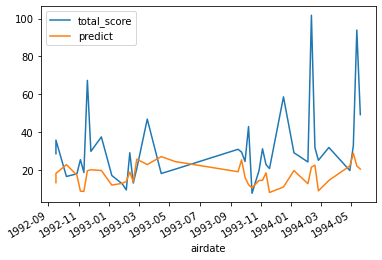

In [447]:
y_validate.set_index('airdate').plot()